# **AdvStat4PhysAna - RLab 3**

**Barone Francesco Pio**, student ID: 2058478

14 april 2022

<a id='exr1'></a>
## **EXR01** - triangular distribution

In [1]:
# pdf
dtriangular <- function(x, a=0, b=2, c=1)
    { (2*(x - ifelse(x<c,a,b) )/((b-a)*(c - ifelse(x<c,a,b) )))*(x>a & x<=b) + 0 }

# cdf
ptriangular <- function(x, a=0, b=2, c=1)
   { (x>a & x<=b)*((x-ifelse(x<c,a,b))^2)/((b-a)*(c-ifelse(x<c,a,b))) + (x>=c) + 0 }

**1.1 |** plot the function, given the interval (a, b)

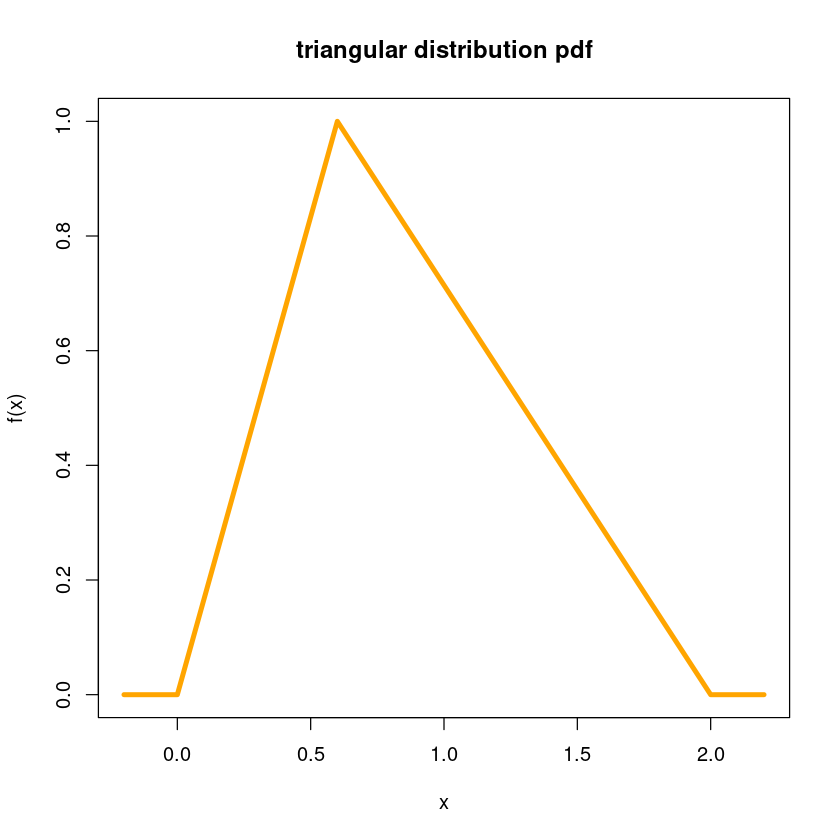

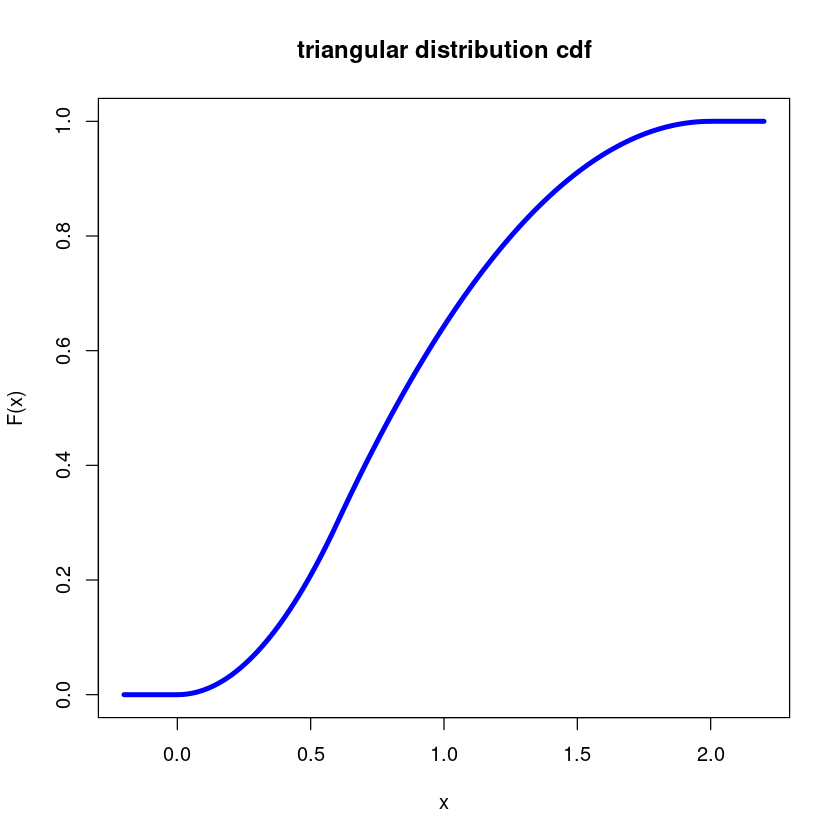

In [2]:
myc = 0.6 # by default c=1, but for test purpose I will use a different value
#   You can also specify the values for a & b. Here I will use the defaults.

xx <- seq(-0.2,2.2,0.01)
plot( xx, dtriangular(xx, c=myc), col = "orange", type="l", lwd=4,
    xlab="x", ylab="f(x)", main = 'triangular distribution pdf')
plot( xx, ptriangular(xx, c=myc), col = "blue", type="l", lwd=4,
    xlab="x", ylab="F(x)", main = 'triangular distribution cdf')

**1.2 |** write an algorithm to generate random numbers from the triangular distribution

To generate the numbers, I explicitly invert the function.

In [3]:
rtriangular <- function(n, a=0, b=2, c=1)
    { u <- runif(n, 0, b-a)
      ifelse(u<(c-a), a + sqrt(u*(c-a)), b - sqrt((u-b+a)*(c-b)) ) }

**1.3 |** generate 10e4 random number from the distribution, show them in an histogram and superimpose the analytical curve

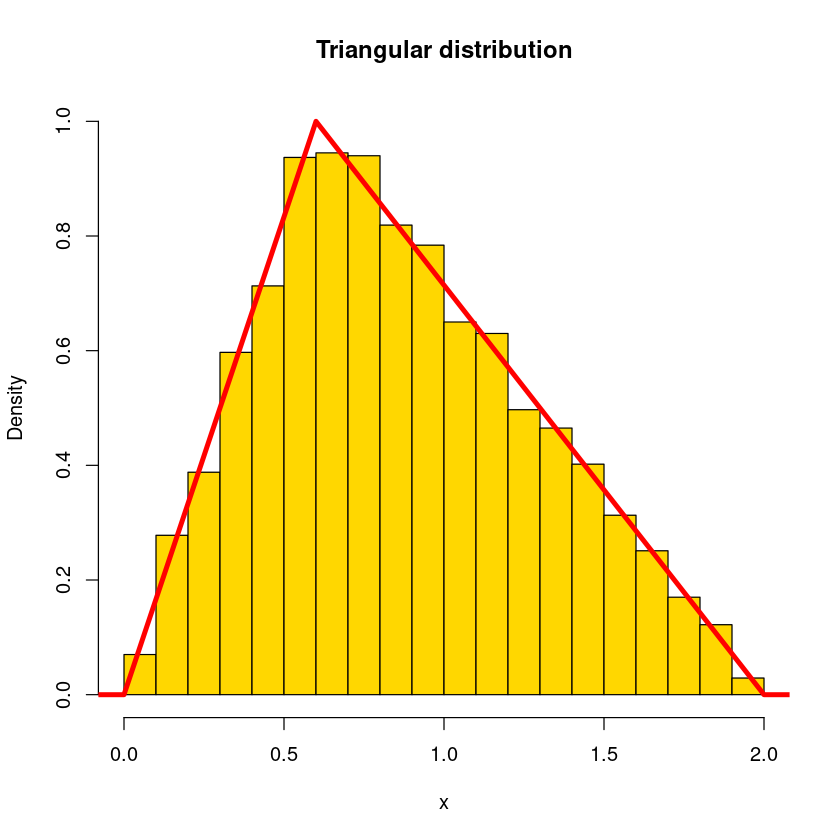

In [4]:
sample <- rtriangular(10^4, c = myc)

hist( sample, col='gold', xlab = 'x', ylim=c(0,1),
      main='Triangular distribution', freq=FALSE)

xx <- seq(-0.3,2.3,0.01)
lines(xx, dtriangular(xx, c=myc), type="l", col="red", lwd=4, ljoin=0)

<a id='exr2'></a>
## **EXR02** -  Markov’s inequality

**a |** exponential distribution

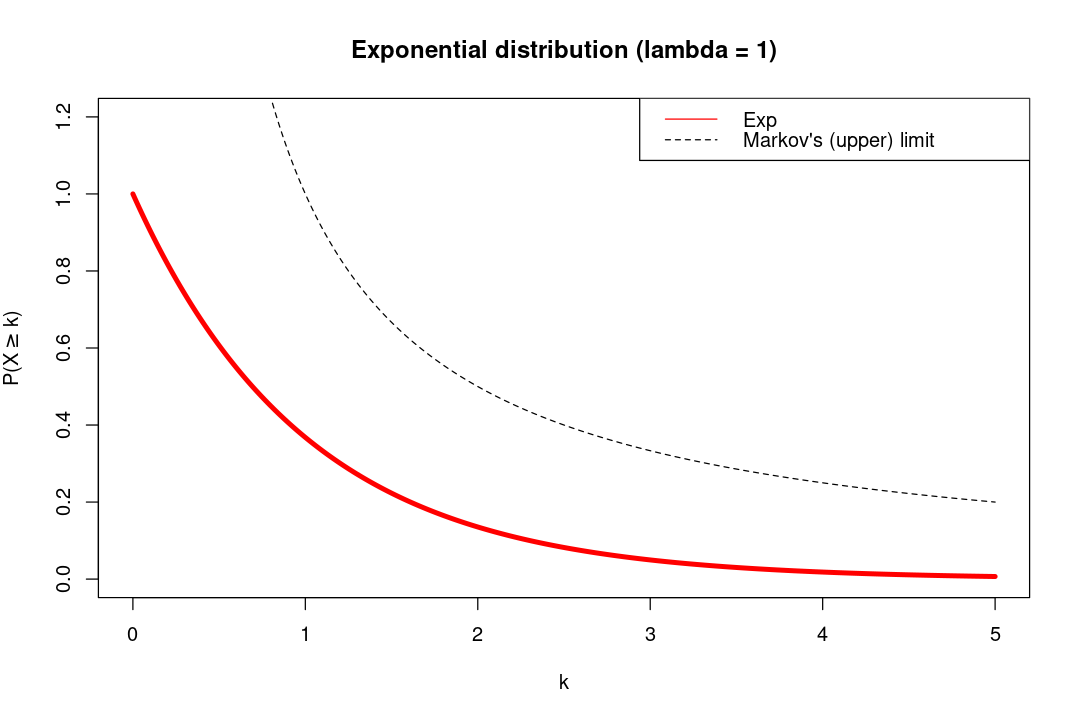

In [5]:
options(repr.plot.width=9, repr.plot.height=6)

# plot the distribution
lambda = 1
xx <- seq(0,5,0.01)
plot(xx, 1 - pexp(xx, rate=lambda), type="l", col="red", lwd=4, ylim=c(0,1.2),
     xlab="k", ylab=expression("P(X">="k)"),
     main = paste0('Exponential distribution (lambda = ',lambda,')'))

# plot Markow's limit
Ex <- 1/lambda
lines(xx, Ex/xx, lty=2)

legend(legend = c("Exp", "Markov's (upper) limit"),
       x = "topright", col=c("red", "black"), lty=c(1,2))

In [ ]:
n <- 10; n. sample <- 2000; delta.p <- 1/n.sample;

p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )



p.star <- dbinom(x=r, size=n, prob=p)
p.norm <- p.star/( delta.p*sum(p.star))
plot(p, p.norm , type="l", lwd=1.5, col='navy', xlim=c(0,1), ylim=c(0,1.1*max(p.norm)), xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,M)")
title(main=paste("r =",r), line=0.3, cex.main=1.2)
p.mean <- delta.p*sum(p*p.norm)
abline (v=p.mean , lty=2)


**b |** uniform distribution

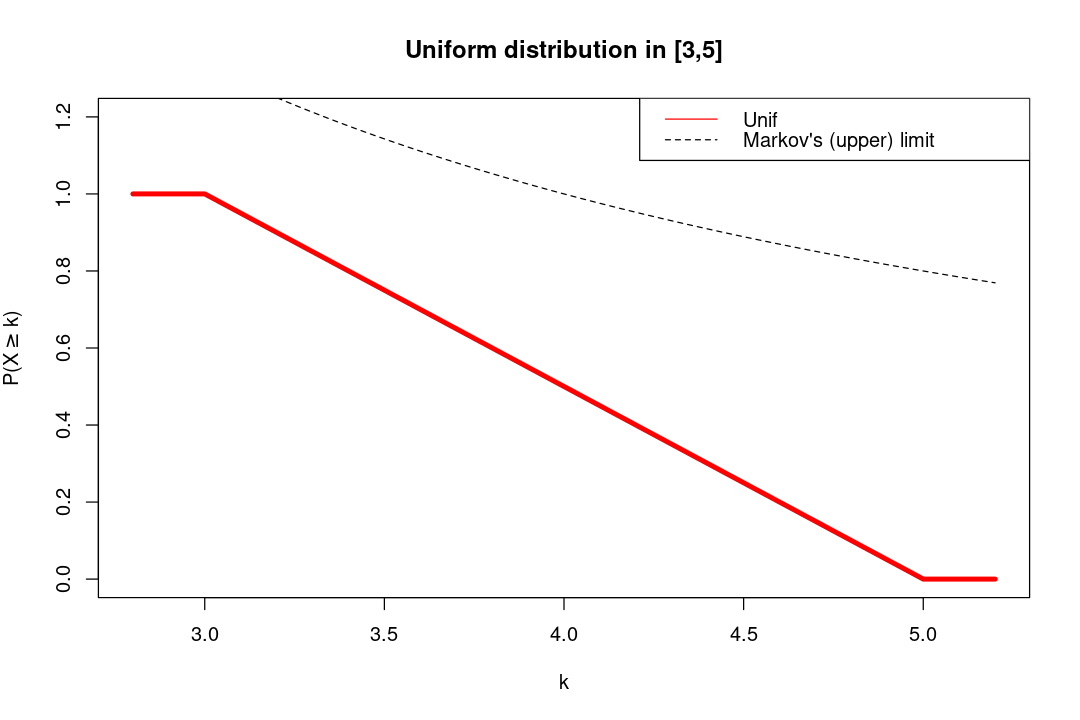

In [6]:
# plot the distribution
xx <- seq(2.8,5.2,0.01)
plot(xx, 1 - punif(xx,3,5), type="l", col="red", lwd=4, ylim=c(0,1.2),
     xlab="k", ylab=expression("P(X">="k)"),
    main = paste0('Uniform distribution in [3,5]'))

# plot Markow's limit
Ex <- (3+5)/2     # expected value
lines(xx, Ex/xx, lty=2)

legend(legend = c("Unif", "Markov's (upper) limit"),
       x = "topright", col=c("red", "black"), lty=c(1,2))

**c |** binomial distribution

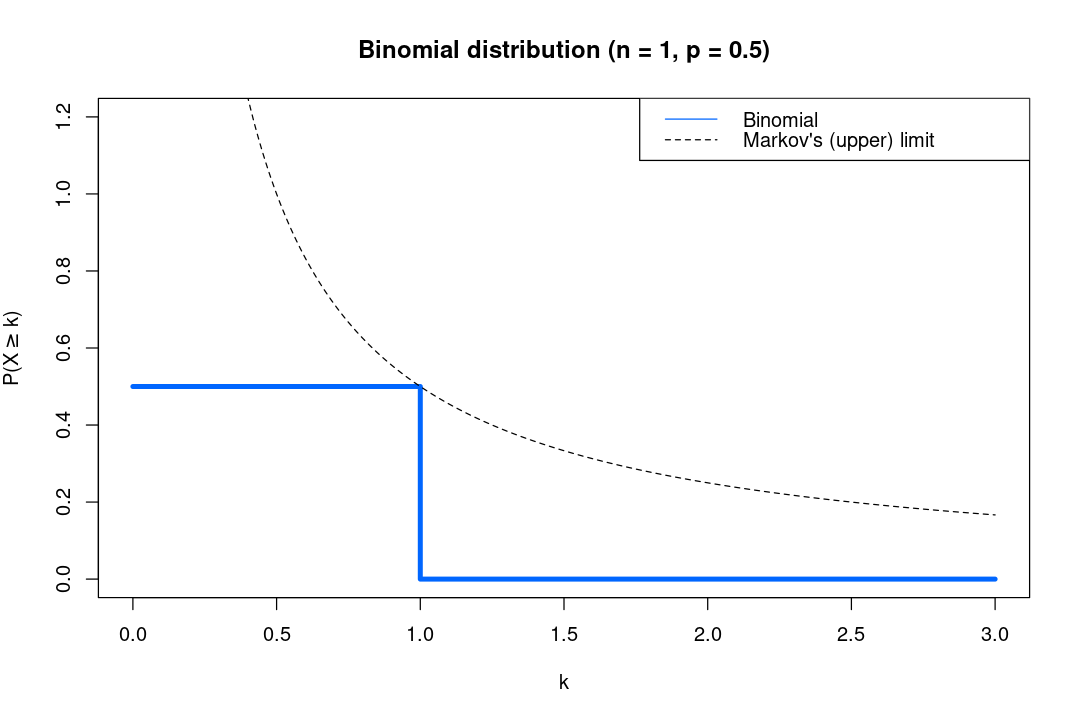

In [7]:
# plot the distribution
xx <- seq(0,3,0.01)
plot(xx, 1 - pbinom(xx, size=1, prob=0.5), type="s", col="#0066FF", lwd=4, ylim=c(0,1.2),
     xlab="k", ylab=expression("P(X">="k)"),
     main = paste0('Binomial distribution (n = 1, p = 0.5)'))

# plot Markow's limit
Ex <- 1*0.5     # expected value
lines(xx, Ex/xx, lty=2)

legend(legend = c("Binomial", "Markov's (upper) limit"),
       x = "topright", col=c("#0066FF", "black"), lty=c(1,2))

**d |** Poisson distribution

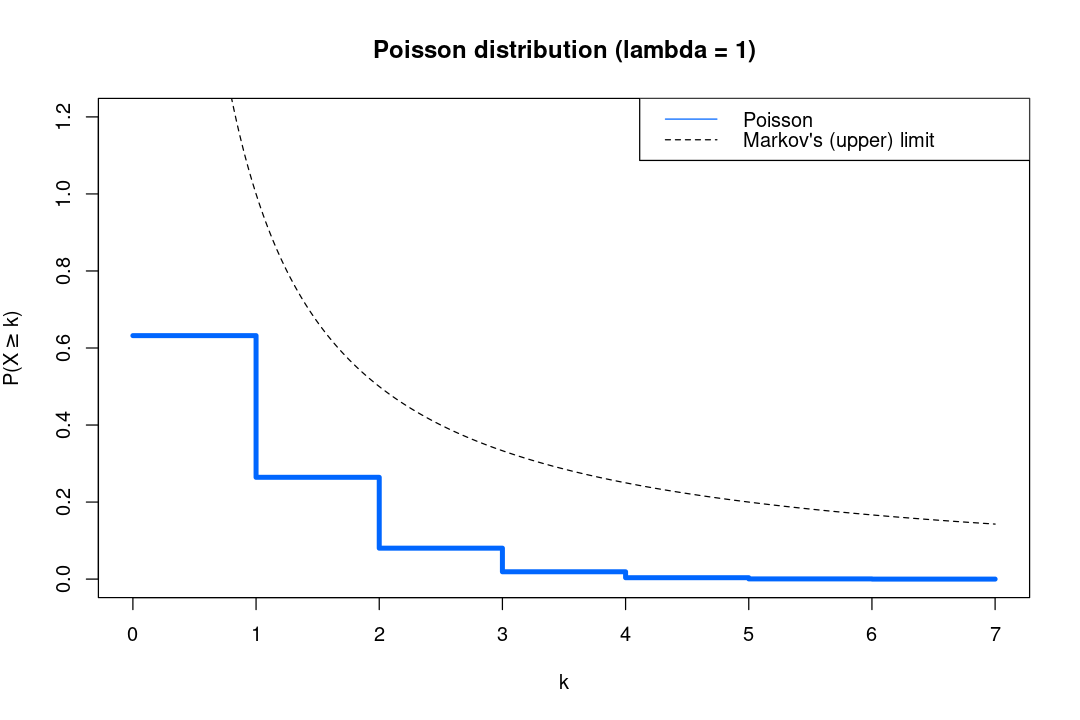

In [8]:
# plot the distribution
lambda = 1
xx <- seq(0,7,0.01)
plot(xx, 1 - ppois(xx, lambda=lambda), type="s", col="#0066FF", lwd=4, ylim=c(0,1.2),
     xlab="k", ylab=expression("P(X">="k)"), 
     main = paste0('Poisson distribution (lambda = ',lambda,')'))

# plot Markow's limit
Ex <- lambda     # expected value
lines(xx, Ex/xx, lty=2)

legend(legend = c("Poisson", "Markov's (upper) limit"),
       x = "topright", col=c("#0066FF", "black"), lty=c(1,2))

<a id='exr3'></a>
## **EXR03** -  Chebyshev’s inequality

**a |** normal distribution

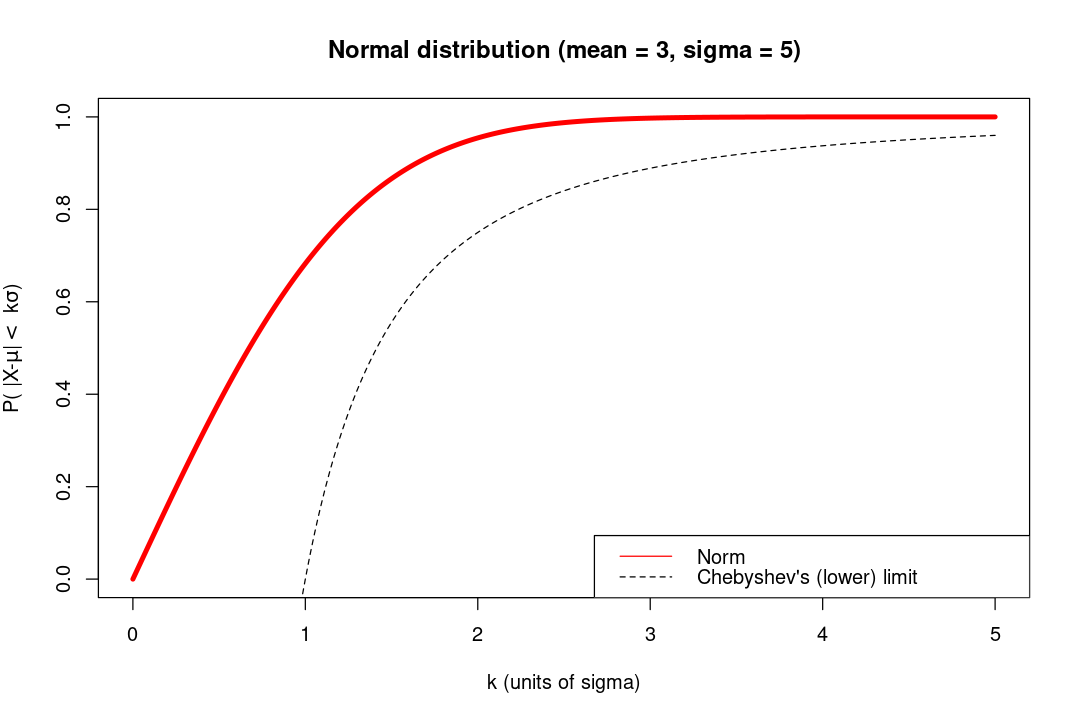

In [9]:
mu <- 3;   sigma <- 5;
kk <- seq(0,5,0.01)  # vector of k

# this is   P( -k sigma < X-mu < k sigma )
P_centered = pnorm(kk*sigma+mu, mean=mu,sd=sigma) - pnorm(-kk*sigma+mu, mean=mu,sd=sigma) 

plot(kk, P_centered, type="l", col="red", lwd=4, ylim=c(0,1),
     xlab="k (units of sigma)", ylab=expression(paste("P( |X-",mu,"|"<" k",sigma,")")),
     main = paste0('Normal distribution (mean = ',mu,', sigma = ',sigma,')'))

# plot Markow's limit
lines(kk, 1 - 1/(kk^2), lty=2)

legend(legend = c("Norm", "Chebyshev's (lower) limit"),
       x = "bottomright", col=c("red", "black"), lty=c(1,2))

**b |** exponential distribution

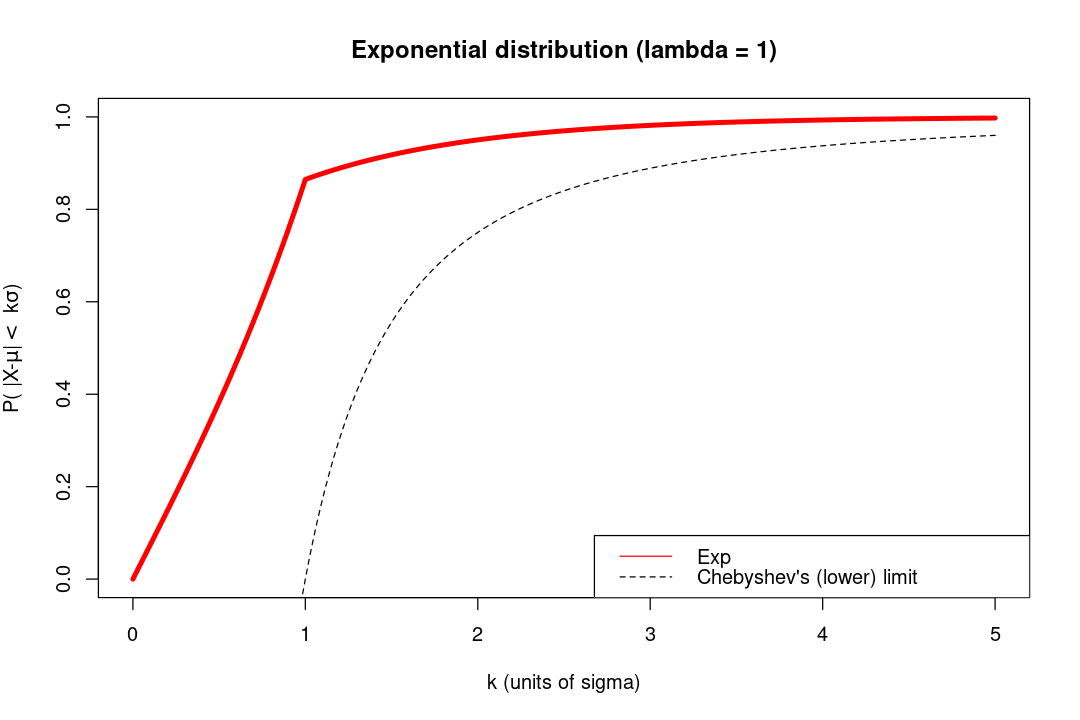

In [10]:
lambda = 1

mu <- 1/lambda;   sigma <- 1/lambda;
kk <- seq(0,5,0.01)  # vector of k

# this is   P( -k sigma < X-mu < k sigma )
P_centered = pexp(kk*sigma+mu, rate=lambda) - pexp(-kk*sigma+mu, rate=lambda) 

plot(kk, P_centered, type="l", col="red", lwd=4, ylim=c(0,1),
     xlab="k (units of sigma)", ylab=expression(paste("P( |X-",mu,"|"<" k",sigma,")")),
     main = paste0('Exponential distribution (lambda = ',lambda,')'))

# plot Markow's limit
lines(kk, 1 - 1/(kk^2), lty=2)

legend(legend = c("Exp", "Chebyshev's (lower) limit"),
       x = "bottomright", col=c("red", "black"), lty=c(1,2))

**c |** uniform distribution

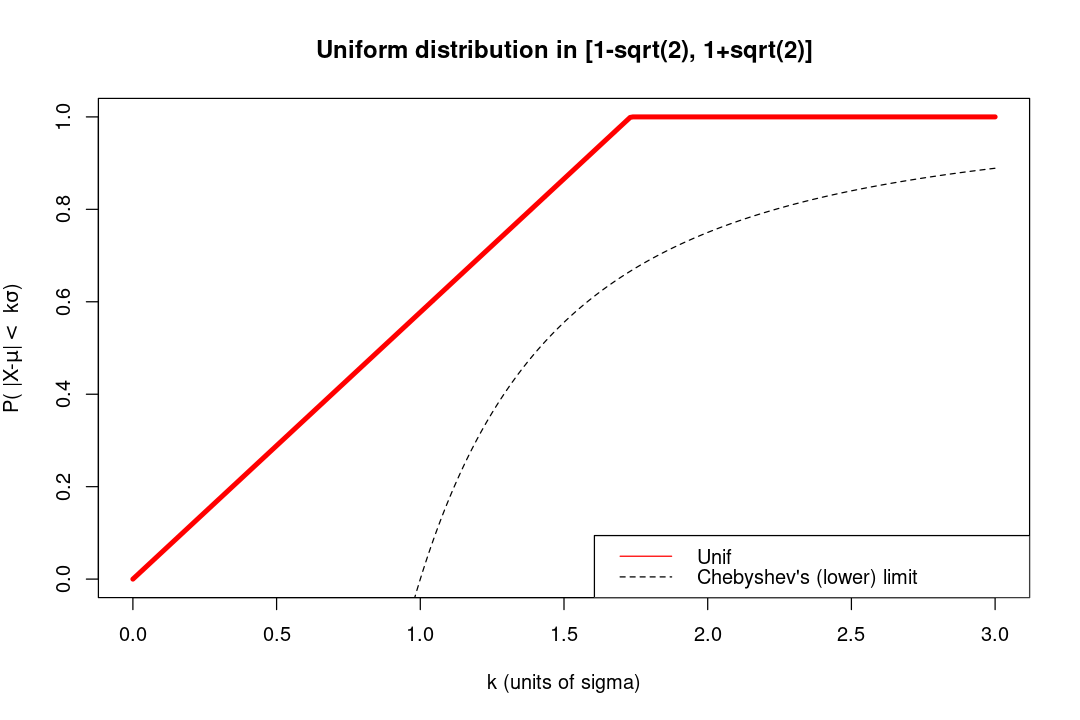

In [11]:
b = 1 + sqrt(2)
a = 1 - sqrt(2)

mu <- (b+a)/2;
sigma <- (b-a)/sqrt(12);
kk <- seq(0,3,0.01)  # vector of k

# this is   P( -k sigma < X-mu < k sigma )
P_centered = punif(kk*sigma+mu, min=a, max=b) - punif(-kk*sigma+mu, min=a, max=b)

plot(kk, P_centered, type="l", col="red", lwd=4, ylim=c(0,1),
     xlab="k (units of sigma)", ylab=expression(paste("P( |X-",mu,"|"<" k",sigma,")")),
     main = 'Uniform distribution in [1-sqrt(2), 1+sqrt(2)]')

# plot Markow's limit
lines(kk, 1 - 1/(kk^2), lty=2)

legend(legend = c("Unif", "Chebyshev's (lower) limit"),
       x = "bottomright", col=c("red", "black"), lty=c(1,2))

**d |** Poisson distribution

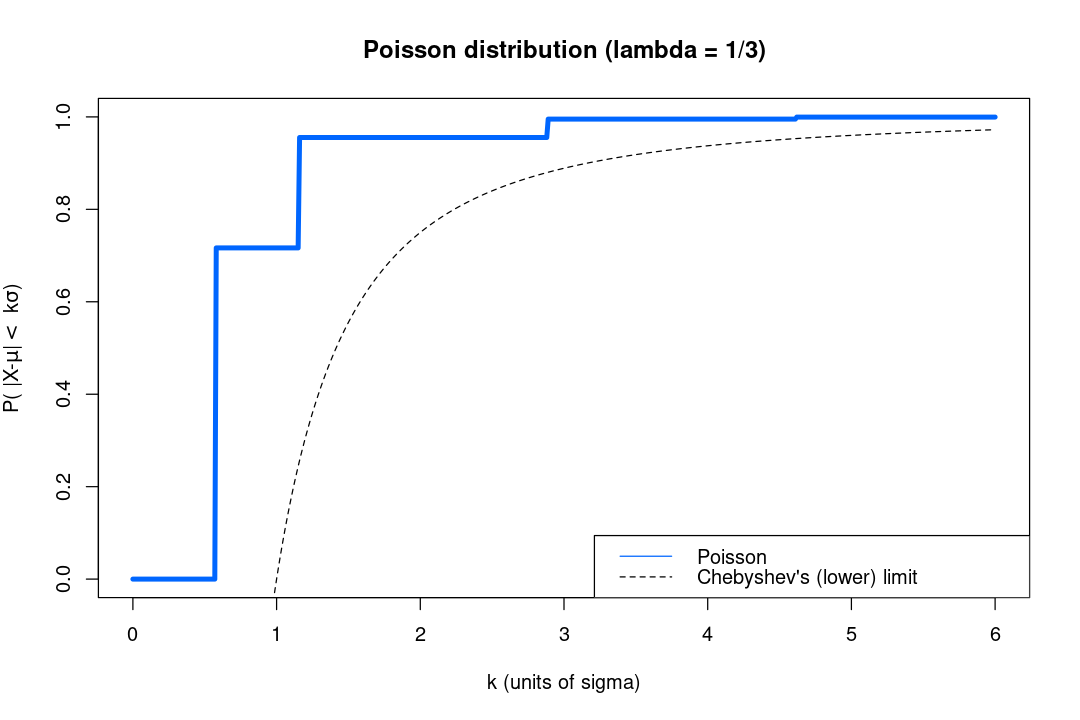

In [12]:
lambda = 1/3

mu <- lambda;   sigma <- sqrt(lambda);
kk <- seq(0,6,0.01)  # vector of k

# this is   P( -k sigma < X-mu < k sigma )
P_centered = ppois(kk*sigma+mu, lambda=lambda) - ppois(-kk*sigma+mu, lambda=lambda) 

plot(kk, P_centered, type="l", col="#0066FF", lwd=4, ylim=c(0,1),
     xlab="k (units of sigma)", ylab=expression(paste("P( |X-",mu,"|"<" k",sigma,")")),
     main = paste0('Poisson distribution (lambda = 1/3)'))

# plot Markow's limit
lines(kk, 1 - 1/(kk^2), lty=2)

legend(legend = c("Poisson", "Chebyshev's (lower) limit"),
       x = "bottomright", col=c("#0066FF", "black"), lty=c(1,2))

<a id='exr4'></a>
## **EXR04** -   Six Boxes Toy Model: inference

Since this exercise requires an user input, I prefer to code it in a .R script. See the attached file `sixboxes.R`.

This is a screenshot of the running script. In the (attached) `/img/` folder you can find a video demo of the script as well.

![title](img/demo_sixboxes.png)

<a id='exr5'></a>
## **EXR05** -   Six Boxes Toy Model: simulation

This exercise has been solved using most of the code of EXR04 to provide an automatic demo of Six boxes model in Jupyter.

In [13]:
nboxes <- 6  # number of boxes
nextr <- 30  # number of extractions

# selects a random box and performs the sampling
selected_box <- floor(runif(1, min=0, max=nboxes))
extraction <- (floor(runif(nextr, min=0, max=nboxes-1)) < selected_box)
##    FALSE encodes Black, TRUE encodes White

# [INFO] run this cell again to select a new box

In [14]:
#  Preallocate matrix & init probability values
prb <- matrix(0, nboxes, nextr+1)
prb[,1] <- 1/nboxes                   # initial probability of each box
prbH <- ((1:nboxes) -1)*1/(nboxes-1)  # probability of white for each box

#  This function implements the Bayes formula on a vector of probabilities prb,
#  given the latest extraction (False for Black, True for White).
bayes <- function(extr, prb) {
    if(extr) { mult <- prbH }   # White
    else     { mult <- 1-prbH } # Black
    return(mult*prb/sum(mult*prb))
}

#  This function takes a matrix of probabilities and plots them for each box.
# The argument np selects the number of extracted points to plot.
plot_probabilities <- function(mprb, np=nextr) {
    
    par( mfrow=c( ceiling(nboxes/3), 3) )  # divide in 3 columns
    
    for(box in 1:nboxes) {
        this_prb = mprb[box,1:(np+1)]
        plot( 0:np, this_prb, main=paste0('H', box-1),
             pch=16, xlim=c(0,nextr), ylim=c(0,1),
             xlab="extraction", ylab="probability",
             col = ifelse(this_prb==0,'grey',"#0066FF") )
             # the color becomes grey when probability is null
    }
}

In [15]:
#  Computing the probabilities given the extracted values
#  & printing the table of probabilities

cat('++++ Table of extractions ++++\n')
for(i in 1:nextr) {
    prb[,i+1] <- bayes(extraction[i], prb[,i])
    cat( paste(ifelse(extraction[i],'White','Black')), '| ')
    cat(prb[,i+1], '\n')
}

++++ Table of extractions ++++
White | 0 0.06666667 0.1333333 0.2 0.2666667 0.3333333 
White | 0 0.01818182 0.07272727 0.1636364 0.2909091 0.4545455 
White | 0 0.004444444 0.03555556 0.12 0.2844444 0.5555556 
White | 0 0.00102145 0.01634321 0.08273749 0.2614913 0.6384065 
White | 0 0.0002259887 0.007231638 0.05491525 0.2314124 0.7062147 
White | 0 4.874482e-05 0.003119669 0.03553497 0.1996588 0.7616378 
White | 0 1.032791e-05 0.001321973 0.02258714 0.1692125 0.8068681 
White | 0 2.159925e-06 0.0005529408 0.01417127 0.1415529 0.8437208 
White | 0 4.473342e-07 0.0002290351 0.00880488 0.117266 0.8736997 
White | 0 9.196015e-08 9.41672e-05 0.005430155 0.09642721 0.8980484 
Black | 0 3.419534e-06 0.002626202 0.10096 0.8964103 0 
White | 0 8.782048e-07 0.001348923 0.07778568 0.9208645 0 
Black | 0 3.251147e-06 0.003745321 0.1439827 0.8522687 0 
White | 0 8.447792e-07 0.001946371 0.1122376 0.8858152 0 
White | 0 2.175098e-07 0.001002285 0.08669522 0.9123023 0 
White | 0 5.561062e-08 0.0005125

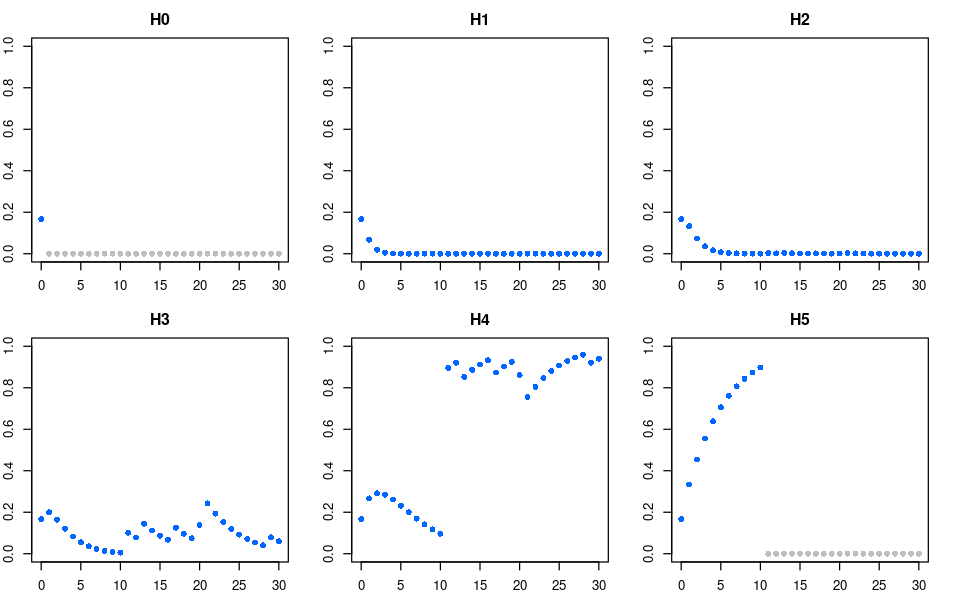

In [16]:
options(repr.plot.width=8, repr.plot.height=5)  # adjust as you wish
par(mar = c(2.4,2,2.4,2))  # tight layout

plot_probabilities(prb)

In [17]:
cat( paste0('The most probable box (by inference) is H',
            which.max(prb[,nextr+1])-1, ', with probability ',
            max(prb[,nextr+1]), '%.\n\n') )

cat( paste0('The selected box was H', selected_box, '.\n\n') )

The most probable box (by inference) is H4, with probability 0.939619581904417%.

The selected box was H4.



End of file.